1 - Packages

In [1]:
# Package imports

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image


import copy
import h5py
import scipy
from scipy import ndimage
#from lr_utils import load_dataset
#from public_tests import *

%matplotlib inline
%load_ext autoreload
%autoreload 2


2 - Load and Process the Dataset


2.1 PROCESSING TRAIN SET

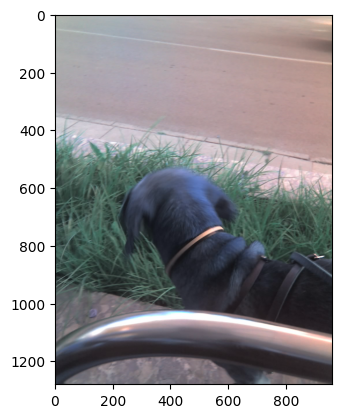

In [2]:
data_dir = 'C:/Users/MEET/Desktop/data'
CATEGORIES = ["blurred", "unblurred"]
for category in CATEGORIES:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break    

In [3]:
os.listdir(data_dir)

['blurred', 'blurred_test', 'unblurred', 'unblurred_test']

In [4]:
print(img_array.shape)

(1280, 960, 3)


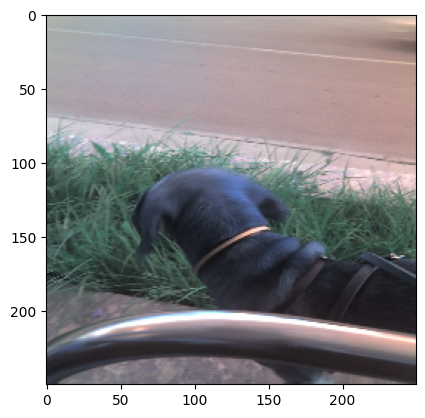

In [5]:
IMG_SIZE = 250
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [6]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(data_dir, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
                
create_training_data()    

In [7]:
print(len(training_data))

620


In [8]:
import random
random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
1
0
1
0
1
1


In [10]:
x_train = []  #training set
y_train = []  #label

In [11]:
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train).reshape(1, len(training_data))

In [12]:
x_train.shape

(620, 250, 250, 3)

In [13]:
y_train.shape

(1, 620)

2.2 PROCESSING TEST SET

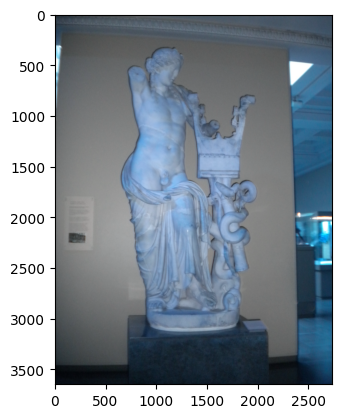

In [14]:
data_dir = 'C:/Users/MEET/Desktop/data'
CATEGORY = ["blurred_test", "unblurred_test"]
for categories in CATEGORY:
    path = os.path.join(data_dir, categories)
    for image in os.listdir(path):
        img_test_array = cv2.imread(os.path.join(path,image))
        plt.imshow(img_test_array)
        plt.show()
        break
    break 

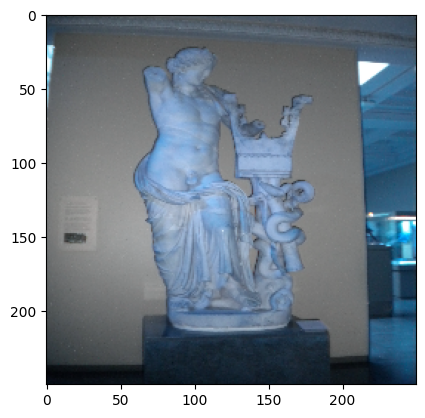

In [15]:
IMG_SIZE = 250
new_test_array = cv2.resize(img_test_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_test_array)
plt.show()

In [16]:
test_data = []
def create_test_data():
    for categories in CATEGORY:
        path = os.path.join(data_dir, categories)
        class_num = CATEGORY.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                test_data.append([new_array, class_num])
            except Exception as e:
                pass
                
create_test_data() 

In [17]:
import random
random.shuffle(test_data)

In [18]:
print(len(test_data))

95


In [19]:
x_test = []
y_test = []

In [20]:
for features, label in test_data:
    x_test.append(features)
    y_test.append(label)
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test).reshape(1, len(test_data))

In [21]:
x_test.shape

(95, 250, 250, 3)

In [22]:
y_test.shape

(1, 95)

3. STATISTICS OF DATASET

In [23]:
m_train = x_test.shape[0]
m_test = x_train.shape[0]
num_px = x_test.shape[1]

# YOUR CODE ENDS HERE

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(x_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(x_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 95
Number of testing examples: m_test = 620
Height/Width of each image: num_px = 250
Each image is of size: (250, 250, 3)
train_set_x shape: (620, 250, 250, 3)
train_set_y shape: (1, 620)
test_set_x shape: (95, 250, 250, 3)
test_set_y shape: (1, 95)


In [24]:
train_set_x_flatten = x_train.reshape(x_train.shape[0], -1).T
test_set_x_flatten = x_test.reshape(x_test.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x_flatten shape: (187500, 620)
train_set_y shape: (1, 620)
test_set_x_flatten shape: (187500, 95)
test_set_y shape: (1, 95)


In [25]:
train_set_x = train_set_x_flatten / 255
test_set_x = test_set_x_flatten / 255

4. DEFINING FUNCTIONS FOR THE MODEL

In [26]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [27]:
def initialize_with_zeros(dim):

    w = np.zeros(shape=(dim, 1), dtype=np.float32)
    b = 0.0
    return w, b

In [28]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    epsilon = 1e-8  # Small value to avoid division by zero or invalid logarithms
    cost = -1/m * (np.sum(Y * np.log(A + epsilon) + (1 - Y) * np.log(1 - A + epsilon)))
    
    dZ = A - Y
    dw = 1/m * np.dot(X, dZ.T)
    db = 1/m * np.sum(dZ)
    
    # Squeeze cost to remove single-dimensional entries
    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [29]:
def optimize(w, b, X, Y, num_iterations=1000, learning_rate=0.01, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):

        # YOUR CODE STARTS HERE
        grads, cost = propagate(w, b, X, Y)
        
        # YOUR CODE ENDS HERE
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # YOUR CODE STARTS HERE
        w = w - learning_rate*dw
        b = b - learning_rate*db
        # YOUR CODE ENDS HERE
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [30]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
              Y_prediction[0,i] = 1
        else:
              Y_prediction[0,i] = 0
        
        # YOUR CODE ENDS HERE
    
    return Y_prediction

In [110]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.005, print_cost=False):
    w, b = initialize_with_zeros(dim=X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params['w']
    b = params['b']
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d    

5. TRAINING THE MODEL

In [111]:
logistic_regression_model = model(train_set_x, y_train, test_set_x, y_test, num_iterations=2000, learning_rate=0.005, print_cost=True)


Cost after iteration 0: 0.693147
Cost after iteration 100: 5.522561
Cost after iteration 200: 4.682231
Cost after iteration 300: 5.463290
Cost after iteration 400: 4.466903
Cost after iteration 500: 4.889740
Cost after iteration 600: 5.255398
Cost after iteration 700: 3.920650
Cost after iteration 800: 0.552967
Cost after iteration 900: 3.013469
Cost after iteration 1000: 0.786441
Cost after iteration 1100: 0.241385
Cost after iteration 1200: 0.188535
Cost after iteration 1300: 0.164132
Cost after iteration 1400: 0.535606
Cost after iteration 1500: 0.092122
Cost after iteration 1600: 0.056503
Cost after iteration 1700: 0.031717
Cost after iteration 1800: 0.020644
Cost after iteration 1900: 0.015882
train accuracy: 99.6774193548387 %
test accuracy: 67.36842105263158 %


6. ANALYSING THE RESULT

In [118]:
logistic_regression_model['Y_prediction_test']

array([[1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
        1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1.]])

In [122]:
logistic_regression_model['Y_prediction_test'][0, 51]

1.0

y = 1, you predicted that it is a "['undistorted']" picture.


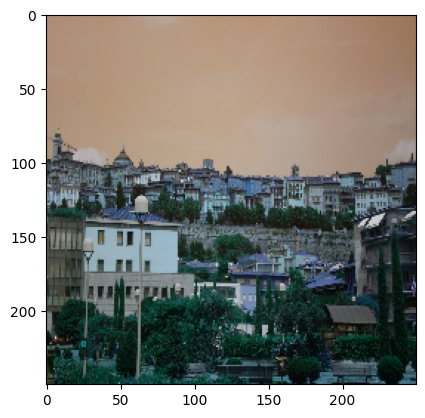

In [130]:
# Example of a picture that was wrongly classified
index = 60
y = logistic_regression_model['Y_prediction_test'][0,index]
if y < 0.5:
    classes = ["blurred"]
elif y > 0.5:
    classes = ["undistorted"]

plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(y_test[0,index]) + ", you predicted that it is a \"" + str(classes) +  "\" picture.")


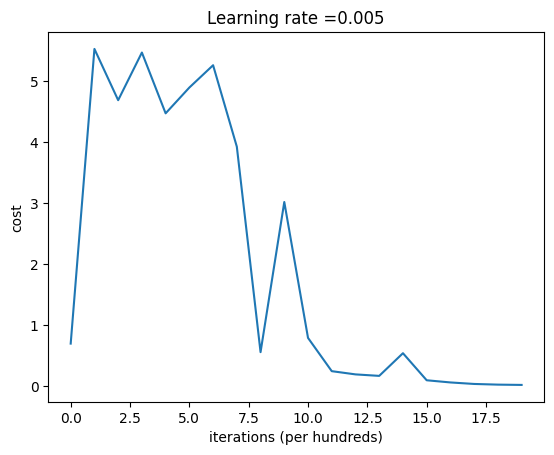

In [131]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()